In [1]:
import math
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import scipy as sp
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
path = r'/Users/lethu/OneDrive/Documents/University Items/Lake Forest Stuff/Work/Fall 20/CSCI 250/CS 250/vgsales.csv'
df1 = pd.read_csv(path)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df1.isnull().sum()
df1.dropna(how= "any", inplace= True)
df1.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

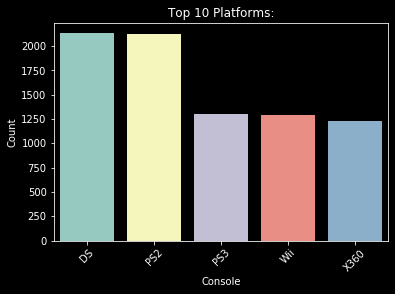

In [7]:
platform = Counter(df1['Platform'].tolist()).most_common(5)
names = [x[0] for x in platform]
counts = [x[1] for x in platform]

plt.style.use("dark_background")
sns.barplot(x=names, y=counts)

plt.title("Top 10 Platforms:")
plt.xlabel("Console")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

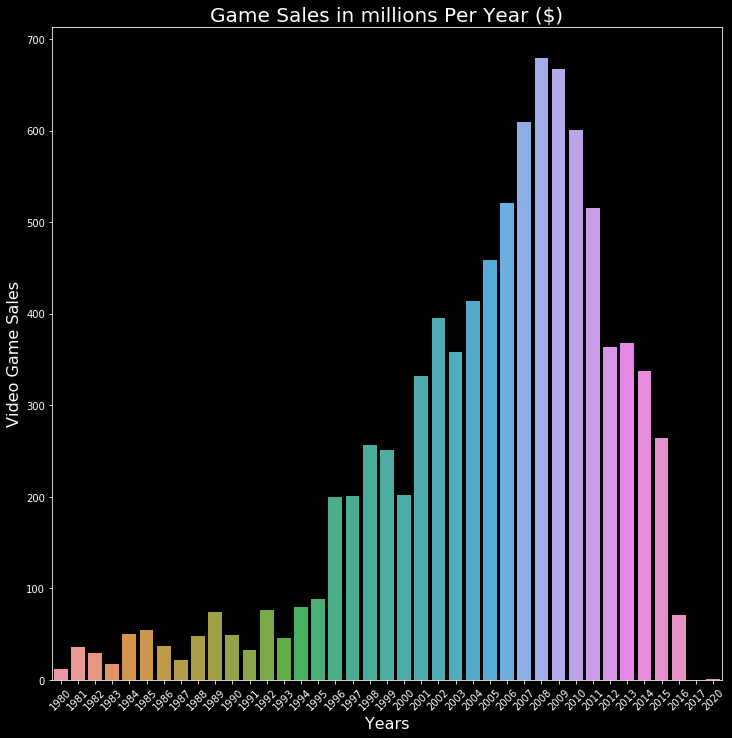

In [8]:
y = df1.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.style.use("dark_background")
plt.figure(figsize=(12,12))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='Years', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=10, rotation=45)
ax.set_ylabel(ylabel='Video Game Sales', fontsize=16)
ax.set_title(label='Game Sales in millions Per Year ($)', fontsize=20)
plt.show()

In [22]:
pla = df1['Platform'].unique()
americas_s, europe_s, japan_s, other_s, global_s = [], [], [], [], []

for console in pla:
    americas_s.append(df1[df1['Platform'] == console]['NA_Sales'].sum())
    europe_s.append(df1[df1['Platform'] == console]['EU_Sales'].sum())
    japan_s.append(df1[df1['Platform'] == console]['JP_Sales'].sum())
    other_s.append(df1[df1['Platform'] == console]['Other_Sales'].sum())
    global_s.append(df1[df1['Platform'] == console]['Global_Sales'].sum())
    
console_sales = pd.DataFrame({'platform': pla,'na': americas_s,'eu': europe_s,'jp': japan_s,'ot': other_s,'gb': global_s})

console_sales.head()

,platform,na,eu,jp,ot,gb
0,Wii,286.88,157.46,40.44,46.64,531.51
1,NES,107.12,16.78,77.39,4.48,205.78
2,GB,65.54,35.04,53.98,5.74,160.29
3,DS,172.97,72.44,87.08,25.08,358.03
4,PS3,305.11,262.70,63.02,109.18,739.82


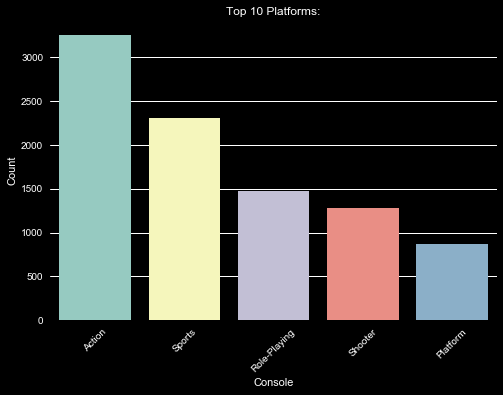

In [23]:
genre = Counter(df1['Genre'].tolist()).most_common(5)
names = [x[0] for x in genre]
counts = [x[1] for x in genre]

plt.style.use("dark_background")
sns.barplot(x=names, y=counts)

plt.title("Top 10 Platforms:")
plt.xlabel("Console")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [24]:
top5_list = df1.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False).head(5).index
df5 = df1[df1.Genre.isin(top5_list)]

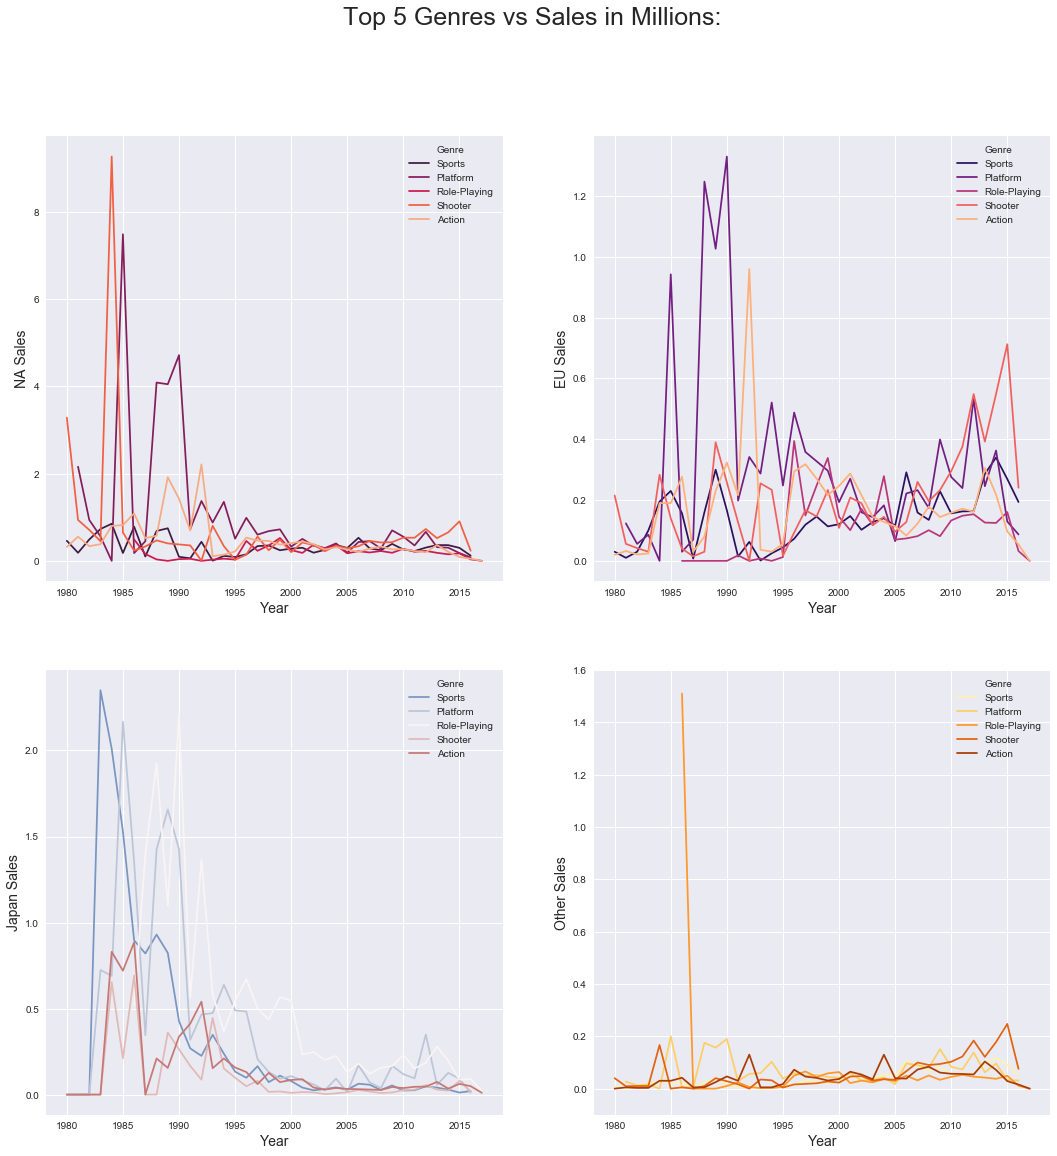

In [25]:
plt.style.use("seaborn")
fig, (ax0,ax1) = plt.subplots(2,2, figsize=(18,18))


sns.lineplot(x='Year', y='NA_Sales', hue='Genre', data=df5, ci=None, ax=ax0[0], palette='rocket')
sns.lineplot(x='Year', y='EU_Sales', hue='Genre', data=df5, ci=None, ax=ax0[1], palette="magma")
sns.lineplot(x='Year', y='JP_Sales', hue='Genre', data=df5, ci=None, ax=ax1[0], palette='vlag')
sns.lineplot(x='Year', y='Other_Sales', hue='Genre', data=df5, ci=None, ax=ax1[1], palette='YlOrBr')


fig.suptitle('Top 5 Genres vs Sales in Millions:', fontsize=25)


ax0[0].legend(loc='upper right')
ax0[1].legend(loc='upper right')
ax1[0].legend(loc='upper right')
ax1[1].legend(loc='upper right')

ax1[1].set_ylim(-0.1,1.6)

ax0[0].set_ylabel('NA Sales', fontsize=14)
ax0[1].set_ylabel('EU Sales', fontsize=14)
ax1[0].set_ylabel('Japan Sales', fontsize=14)
ax1[1].set_ylabel('Other Sales', fontsize=14)

ax0[0].set_xlabel('Year', fontsize=14)
ax0[1].set_xlabel('Year', fontsize=14)
ax1[0].set_xlabel('Year', fontsize=14)
ax1[1].set_xlabel('Year', fontsize=14)


plt.show()

In [122]:
# label encoding of categorical variables

encode = LabelEncoder()
df5['Genre_lbe'] = encode.fit_transform(df5['Genre'])
df5['Platform_lbe'] = encode.fit_transform(df5['Platform'])
df5.Publisher.fillna('Unknown', inplace=True)
df5['Publisher_lbe'] = encode.fit_transform(df5['Publisher'])
df5.sample(3)

/Users/ibrahimad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/ibrahimad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/ibrahimad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Cat,Platform_Cat,Genre_lbe,Platform_lbe,Publisher_lbe
6236,6238,Dave Mirra Freestyle BMX 2,GC,2001.0,Sports,Acclaim Entertainment,0.21,0.06,0.00,0.01,0.28,10,7,4,6,12
8982,8984,Boktai: The Sun is in Your Hand,GBA,2003.0,Role-Playing,Konami Digital Entertainment,0.10,0.04,0.00,0.00,0.15,7,6,2,5,195
12311,12313,Dynasty Warriors Vs,3DS,2012.0,Action,Ackkstudios,0.00,0.00,0.06,0.00,0.06,0,2,0,1,14


In [129]:
df5 = df.loc[:,'Global_Sales':]
df5.head()

,Global_Sales,Genre_Cat,Platform_Cat
0,82.74,10,26
1,40.24,4,11
2,35.82,6,26
3,33.00,10,26
4,31.37,7,5


In [143]:
y = df5.Global_Sales.values
x_val = df5.drop(['Global_Sales'], axis = 1)
x=(x_val-np.min(x_val))/(np.max(x_val)-np.min(x_val)).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state= 42)

pca = PCA()
x_reduced_train = pca.fit_transform(scale(x_train))
pcr_model = lm.fit(x_reduced_train, y_train)

In [2]:
y_pred = pcr_model.predict(x_reduced_train)
rmse_pcr=np.sqrt(mean_squared_error(y_train, y_pred))
df5["Global_Sales"].mean()
r2score_pcr=r2_score(y_train, y_pred)
r2score_pcr

NameError: name 'pcr_model' is not defined

In [157]:
pca2 = PCA()
lm = LinearRegression()

x_reduced_test = pca2.fit_transform(scale(x_test))
y_pred = pcr_model.predict(x_reduced_test)
pcr_model = lm.fit(x_reduced_train, y_train)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.7486115132251043


In [158]:
from sklearn import model_selection
cv = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 42)

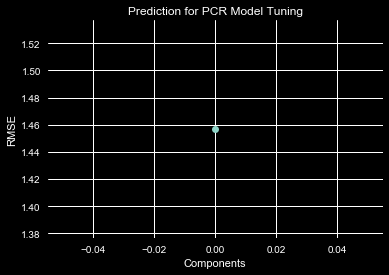

In [159]:
RMSE = []
for i in np.arange(1, x_reduced_train.shape[1] + 1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm, x_reduced_train[:,:i], y_train.ravel(), cv=cv, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)
    break

plt.style.use("dark_background")
plt.plot(RMSE, 'o')
plt.xlabel('Components')
plt.ylabel('RMSE')
plt.title('Prediction for PCR Model Tuning');

In [141]:
lm = LinearRegression()
pcr_model = lm.fit(x_reduced_train[:,0:2], y_train)
y_pred = pcr_model.predict(x_reduced_train[:,0:2])
print(np.sqrt(mean_squared_error(y_train, y_pred)))

1.4565020374612632


In [142]:
y_pred = pcr_model.predict(x_reduced_test[:,0:2])
print(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_score(y_test, y_pred)

1.7486115132251043


0.0015093231814099495